In [1]:
from tools import split, prepare, train, evaluate, plot, train_with_adaptive_learning_rate
import pandas as pd


c:\Users\mkapica\IdeaProjects\artificial-intelligence-and-knowledge-engineering\lab-05\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("archive/training.csv")

Training model with 10 samples
Error predicting
Training model with 100 samples
Error predicting
Training model with 500 samples
Error preparing
Error predicting
Training model with 1000 samples
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error predicting
Training model with 5000 samples
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error predicting


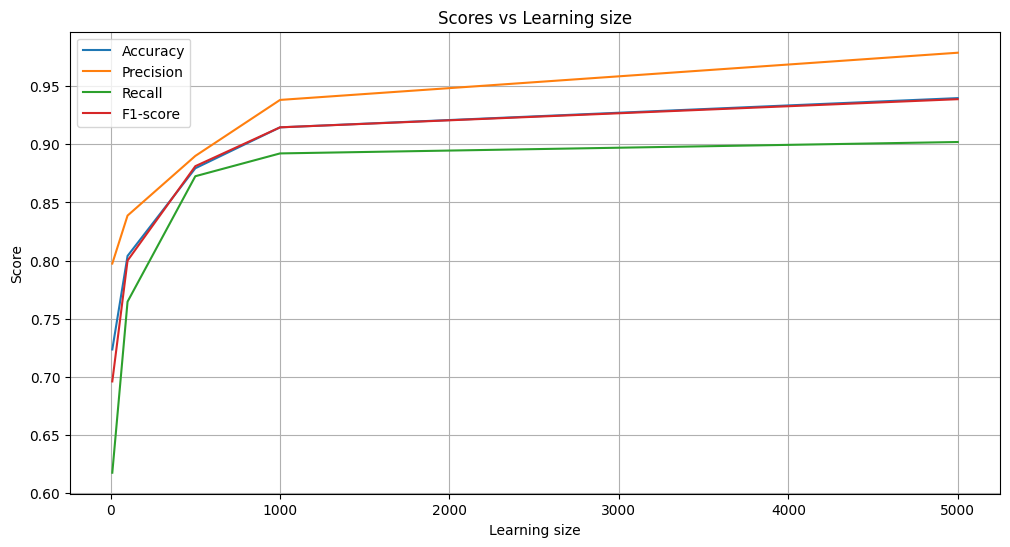

In [3]:
# 1. Effect of learning size

sizes = [10, 100, 500, 1000, 5000]
results = []

for size in sizes:
    print(f"Training model with {size} samples")
    train_data, test_data = split(df, train_size=size, test_size=200)
    X_train, y_train = prepare(train_data)
    model = train(X_train, y_train, lr=0.0005, epochs=100)
    scores = evaluate(model, test_data)
    results.append(scores)

plot(results, sizes, "Learning size", "Scores")

Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error predicting
Error predicting
Error predicting
Error predicting


c:\Users\mkapica\IdeaProjects\artificial-intelligence-and-knowledge-engineering\lab-05\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Error predicting


c:\Users\mkapica\IdeaProjects\artificial-intelligence-and-knowledge-engineering\lab-05\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


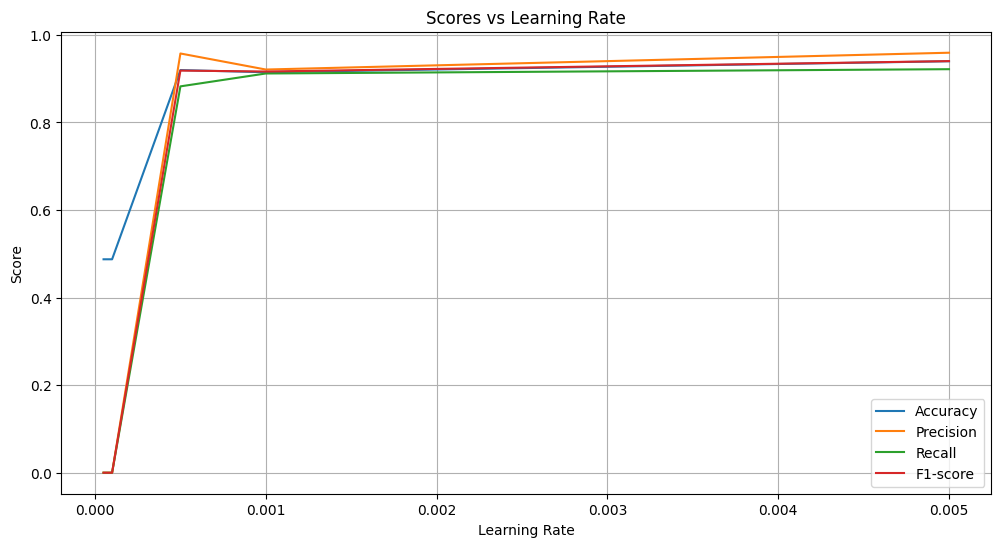

In [4]:
# 2. Effect of learning rate

learning_rates = [0.005, 0.001, 0.0005, 0.0001, 0.00005]
results_lr = []
train_data, test_data = split(df, train_size=1000, test_size=200)
X_train, y_train = prepare(train_data)

for lr in learning_rates:
    model = train(X_train, y_train, lr=lr, epochs=100)
    scores = evaluate(model, test_data)
    results_lr.append(scores)

plot(results_lr, learning_rates, "Learning Rate", "Scores")

Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error predicting


c:\Users\mkapica\IdeaProjects\artificial-intelligence-and-knowledge-engineering\lab-05\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Error predicting
Error predicting
Error predicting
Error predicting


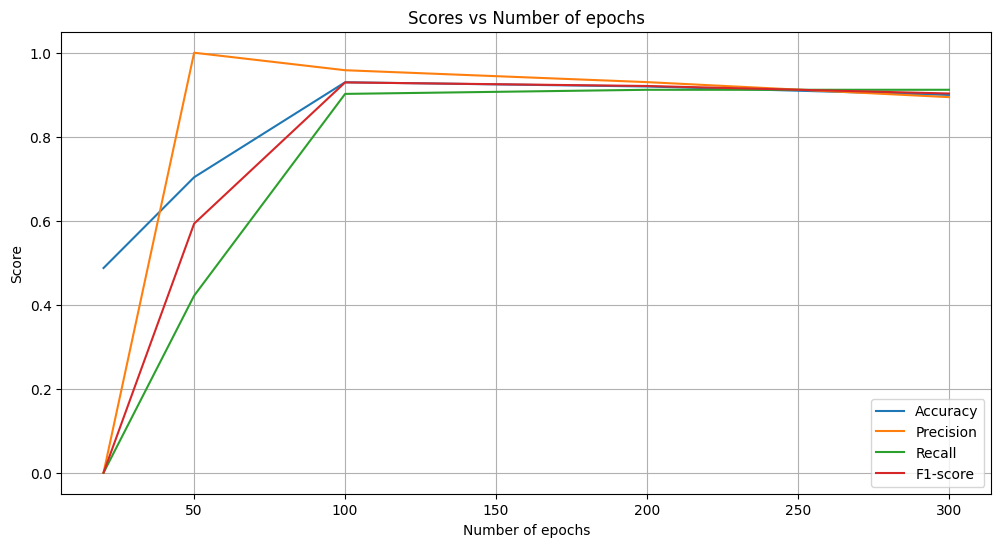

In [5]:
# 3. Effect of epochs

epochs_list = [20, 50, 100, 200, 300]
results_epochs = []
train_data, test_data = split(df, train_size=1000, test_size=200)
X_train, y_train = prepare(train_data)

for ep in epochs_list:
    model = train(X_train, y_train, lr=0.0005, epochs=ep)
    scores = evaluate(model, test_data)
    results_epochs.append(scores)

plot(results_epochs, epochs_list, "Number of epochs", "Scores")

In [6]:
# 4. Optimal 
train_data, test_data = split(df, train_size=5000, test_size=200)
X_train, y_train = prepare(train_data)


Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing
Error preparing


In [7]:

model = train(X_train, y_train, lr=0.005, epochs=200)
scores = evaluate(model, test_data)
print(scores)
acc, prec, rec, f1 = scores
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-Score:", f1)

model = train_with_adaptive_learning_rate(X_train, y_train, epochs=200)
scores = evaluate(model, test_data)
acc, prec, rec, f1 = scores
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-Score:", f1)

Error predicting
(0.949748743718593, 0.9791666666666666, 0.9215686274509803, 0.9494949494949495)
Accuracy: 0.949748743718593
Precision: 0.9791666666666666
Recall: 0.9215686274509803
F1-Score: 0.9494949494949495


c:\Users\mkapica\IdeaProjects\artificial-intelligence-and-knowledge-engineering\lab-05\.venv\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Error predicting
Accuracy: 0.949748743718593
Precision: 0.9791666666666666
Recall: 0.9215686274509803
F1-Score: 0.9494949494949495


In [8]:
# 5. Effect of perturbation

# Clean data
model = train(X_train, y_train, lr=0.005, epochs=200)
metrics_clean = evaluate(model, test_data)
print('Czyste dane:', metrics_clean)

# Perturbated data
model = train(X_train, y_train, lr=0.005, epochs=200)
metrics_noisy = evaluate(model, test_data)
print('Zaburzone dane (szum Gaussa):', metrics_noisy)

Error predicting
Czyste dane: (0.9547738693467337, 0.9696969696969697, 0.9411764705882353, 0.9552238805970149)
Error predicting
Zaburzone dane (szum Gaussa): (0.9447236180904522, 0.9595959595959596, 0.9313725490196079, 0.945273631840796)
